In [ ]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 730.1 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
import mplfinance as mpf
import re
import numpy as np
from numpy import polyfit

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/H4TF 4 CON CÚ/Business Case 1/Data/train data.csv')
train.head()

,Trading Date,Closing Price,Opening Price,Highest Price,Lowest Price,Trading Volume,Percentage Change
0,2022-02-28,35722.1,34851.7,36176.2,34851.7,45.76,2.83
1,2022-02-25,34738.2,34889.6,35078.8,34738.2,16.61,-0.22
2,2022-02-24,34813.9,35381.5,35457.2,34132.8,29.18,-1.50
3,2022-02-23,35343.7,35305.8,35722.1,35003.1,16.88,0.65
4,2022-02-22,35116.6,35041.0,35268.0,34586.9,22.97,-0.54


In [ ]:

test = pd.read_csv('/content/drive/MyDrive/H4TF 4 CON CÚ/Business Case 1/Data/test data.csv')
test.head()

,Trading Date,Closing Price,Opening Price,Highest Price,Lowest Price,Trading Volume,Percentage Change
0,2023-03-31,18909.0,18909.0,19000.0,18500.0,26.15,0.00
1,2023-03-30,18909.0,19091.0,19227.0,18864.0,23.05,0.00
2,2023-03-29,18909.0,18818.0,19182.0,18818.0,19.74,0.48
3,2023-03-28,18818.0,19000.0,19091.0,18818.0,13.56,-0.48
4,2023-03-27,18909.0,18545.0,19000.0,18500.0,22.29,1.96


In [ ]:
train['Trading Date'] = pd.to_datetime(train['Trading Date'])
test['Trading Date'] = pd.to_datetime(test['Trading Date'])

In [ ]:
# Set 'Trading Date' as the index for both datasets
train.set_index('Trading Date', inplace=True)
test.set_index('Trading Date', inplace=True)

In [ ]:
merged_data = pd.concat([train, test])
merged_data.head()

,Closing Price,Opening Price,Highest Price,Lowest Price,Trading Volume,Percentage Change
Trading Date,,,,,,
2022-02-28,35722.1,34851.7,36176.2,34851.7,45.76,2.83
2022-02-25,34738.2,34889.6,35078.8,34738.2,16.61,-0.22
2022-02-24,34813.9,35381.5,35457.2,34132.8,29.18,-1.50
2022-02-23,35343.7,35305.8,35722.1,35003.1,16.88,0.65
2022-02-22,35116.6,35041.0,35268.0,34586.9,22.97,-0.54


In [ ]:
missing_values = merged_data.isnull().sum()

# Function to print missing values
def print_missing_values(df_name, missing_values):
    if missing_values.any():
        print(f"Missing values found in {df_name}:")
        print(missing_values[missing_values > 0])
    else:
        print(f"No missing values found in {df_name}.")

# Print the missing values for both datasets
print_missing_values("merged_data", missing_values)

No missing values found in merged_data.


In [ ]:
merged_data.dtypes

Closing Price        float64
Opening Price        float64
Highest Price        float64
Lowest Price         float64
Trading Volume       float64
Percentage Change    float64
dtype: object

OVERTIME ANALYSIS

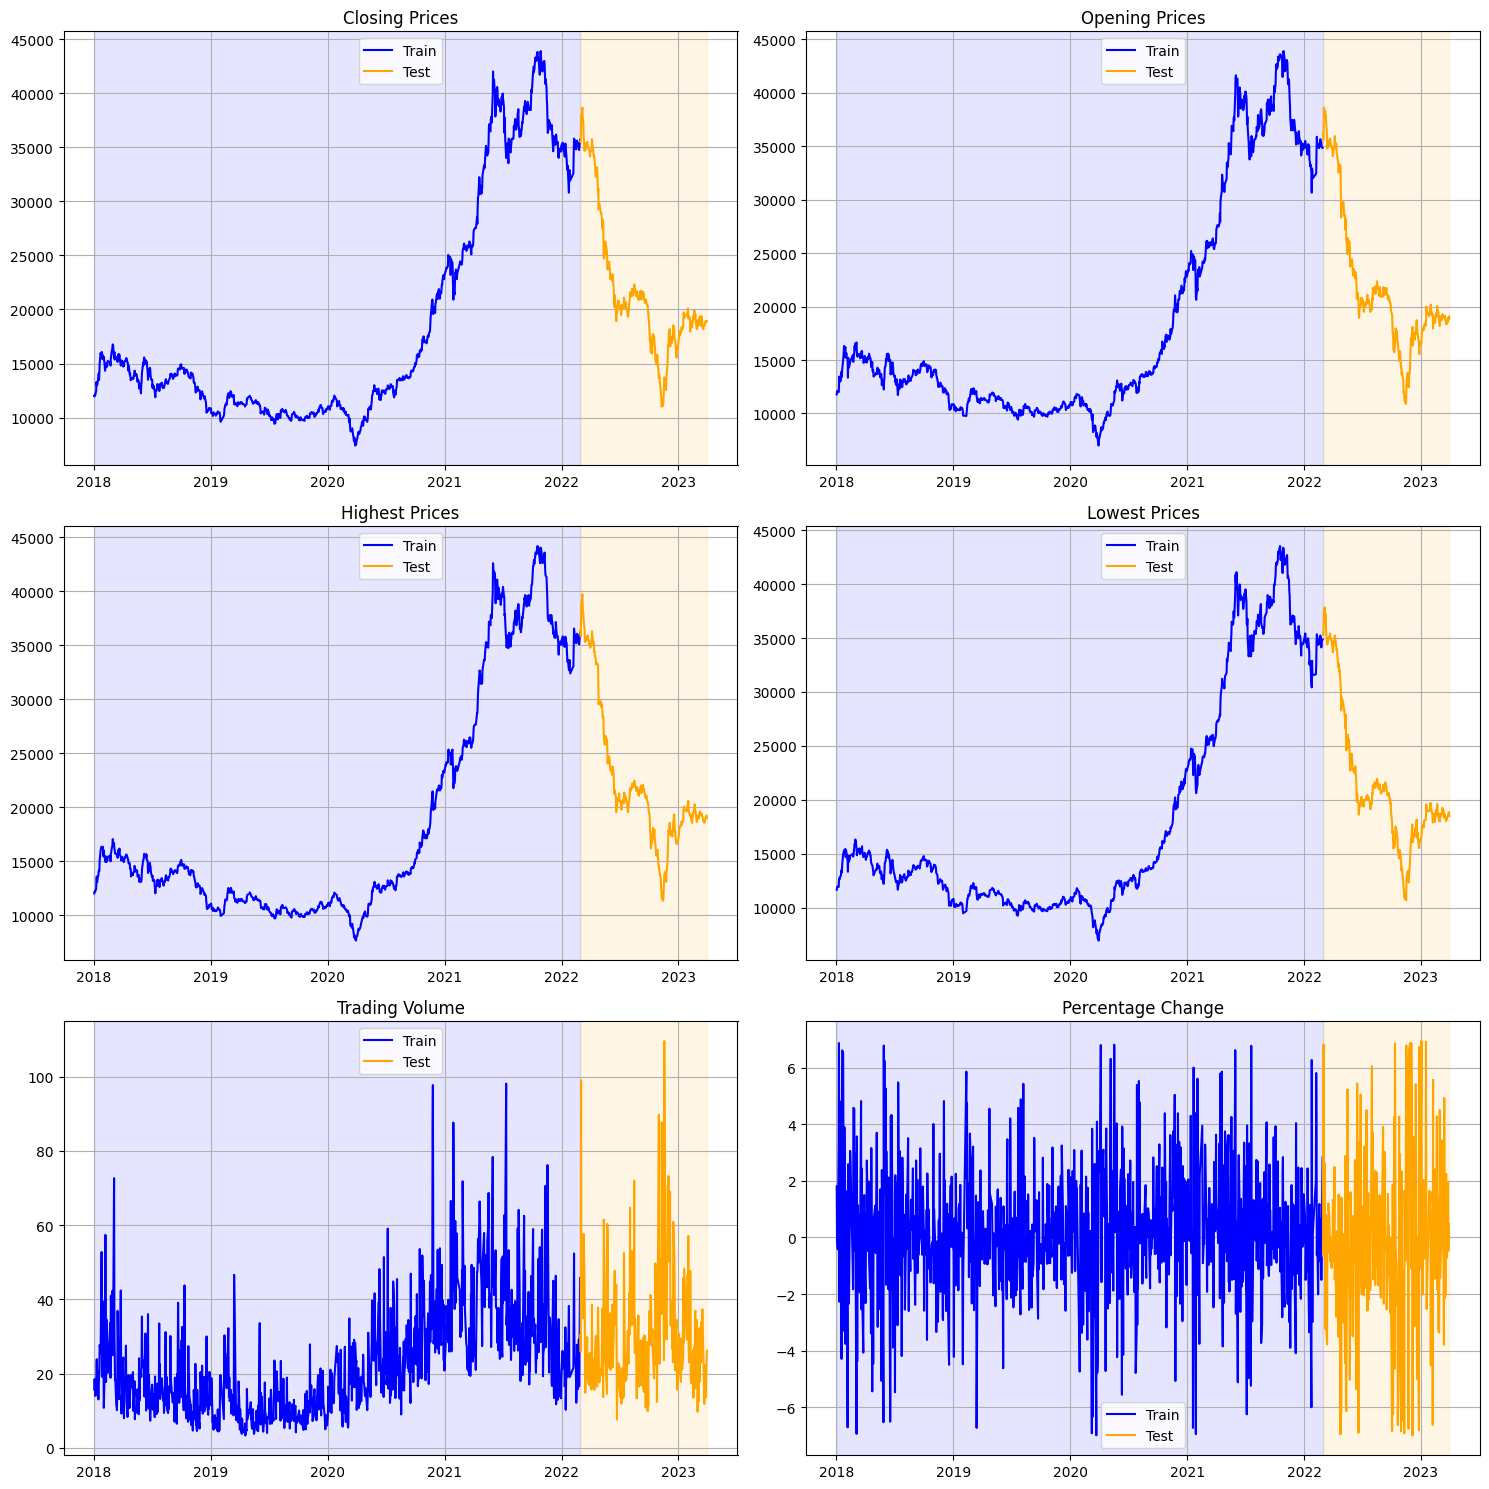

In [ ]:
# Get date ranges for highlighting
train_start = train.index.min()
train_end = train.index.max()
test_start = test.index.min()
test_end = test.index.max()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot Closing Prices
axes[0, 0].plot(train.index, train['Closing Price'], label='Train', color='blue')
axes[0, 0].plot(test.index, test['Closing Price'], label='Test', color='orange')
axes[0, 0].set_title('Closing Prices')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].axvspan(train_start, train_end, color='blue', alpha=0.1)
axes[0, 0].axvspan(test_start, test_end, color='orange', alpha=0.1)

# Plot Opening Prices
axes[0, 1].plot(train.index, train['Opening Price'], label='Train', color='blue')
axes[0, 1].plot(test.index, test['Opening Price'], label='Test', color='orange')
axes[0, 1].set_title('Opening Prices')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].axvspan(train_start, train_end, color='blue', alpha=0.1)
axes[0, 1].axvspan(test_start, test_end, color='orange', alpha=0.1)

# Plot Highest Prices
axes[1, 0].plot(train.index, train['Highest Price'], label='Train', color='blue')
axes[1, 0].plot(test.index, test['Highest Price'], label='Test', color='orange')
axes[1, 0].set_title('Highest Prices')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].axvspan(train_start, train_end, color='blue', alpha=0.1)
axes[1, 0].axvspan(test_start, test_end, color='orange', alpha=0.1)

# Plot Lowest Prices
axes[1, 1].plot(train.index, train['Lowest Price'], label='Train', color='blue')
axes[1, 1].plot(test.index, test['Lowest Price'], label='Test', color='orange')
axes[1, 1].set_title('Lowest Prices')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].axvspan(train_start, train_end, color='blue', alpha=0.1)
axes[1, 1].axvspan(test_start, test_end, color='orange', alpha=0.1)

# Plot Trading Volume
axes[2, 0].plot(train.index, train['Trading Volume'], label='Train', color='blue')
axes[2, 0].plot(test.index, test['Trading Volume'], label='Test', color='orange')
axes[2, 0].set_title('Trading Volume')
axes[2, 0].legend()
axes[2, 0].grid(True)
axes[2, 0].axvspan(train_start, train_end, color='blue', alpha=0.1)
axes[2, 0].axvspan(test_start, test_end, color='orange', alpha=0.1)

# Plot Percentage Change
axes[2, 1].plot(train.index, train['Percentage Change'], label='Train', color='blue')
axes[2, 1].plot(test.index, test['Percentage Change'], label='Test', color='orange')
axes[2, 1].set_title('Percentage Change')
axes[2, 1].legend()
axes[2, 1].grid(True)
axes[2, 1].axvspan(train_start, train_end, color='blue', alpha=0.1)
axes[2, 1].axvspan(test_start, test_end, color='orange', alpha=0.1)

# Adjust layout
plt.tight_layout()
plt.show()


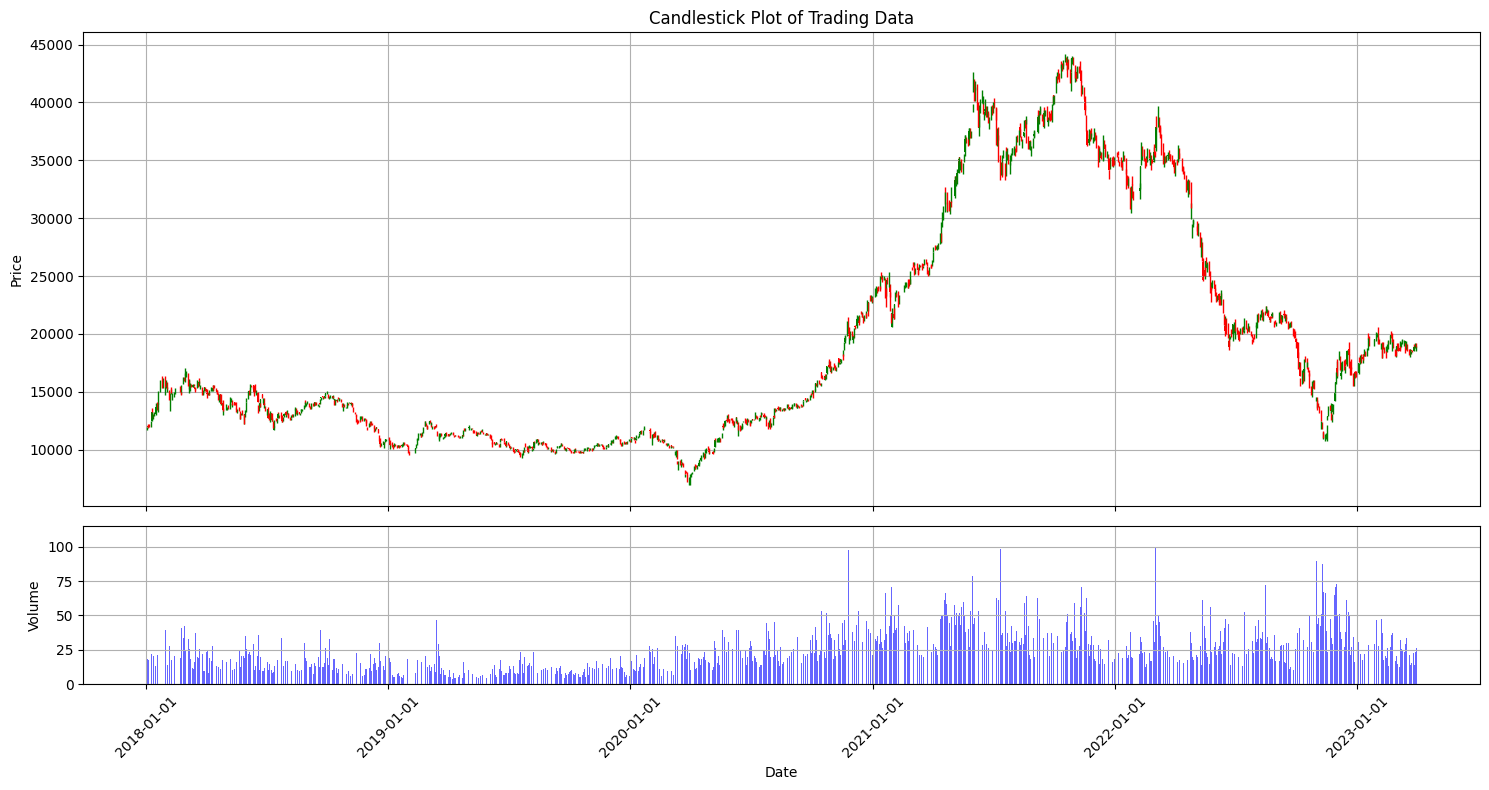

In [ ]:
# Define a function to create the candlestick plot
def create_candlestick_chart(data):
    fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

    # Convert dates to matplotlib format
    data['Date_Num'] = mdates.date2num(data.index.to_pydatetime())

    # Create the OHLC data
    ohlc = data[['Date_Num', 'Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price']].copy()

    # Plot candlestick chart
    for idx, row in ohlc.iterrows():
        if row['Closing Price'] >= row['Opening Price']:
            color = 'green'
            lower = row['Opening Price']
            height = row['Closing Price'] - row['Opening Price']
        else:
            color = 'red'
            lower = row['Closing Price']
            height = row['Opening Price'] - row['Closing Price']

        ax1.add_patch(plt.Rectangle((row['Date_Num'] - 0.3, lower), 0.6, height, fill=True, color=color, linewidth=0))
        ax1.vlines(row['Date_Num'], row['Lowest Price'], row['Highest Price'], color=color, linewidth=1)

    ax1.set_ylabel('Price')
    ax1.set_title('Candlestick Plot of Trading Data')
    ax1.grid(True)

    # Plot volume
    ax2.bar(data.index, data['Trading Volume'], color='blue', alpha=0.6)
    ax2.set_ylabel('Volume')

    # Formatting the date
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.xlabel('Date')

    plt.tight_layout()
    plt.grid(True)
    plt.show()


merged_data = pd.concat([train, test])
# Set the index to 'Trading Date'

# Create the candlestick chart
create_candlestick_chart(merged_data)


Correlation

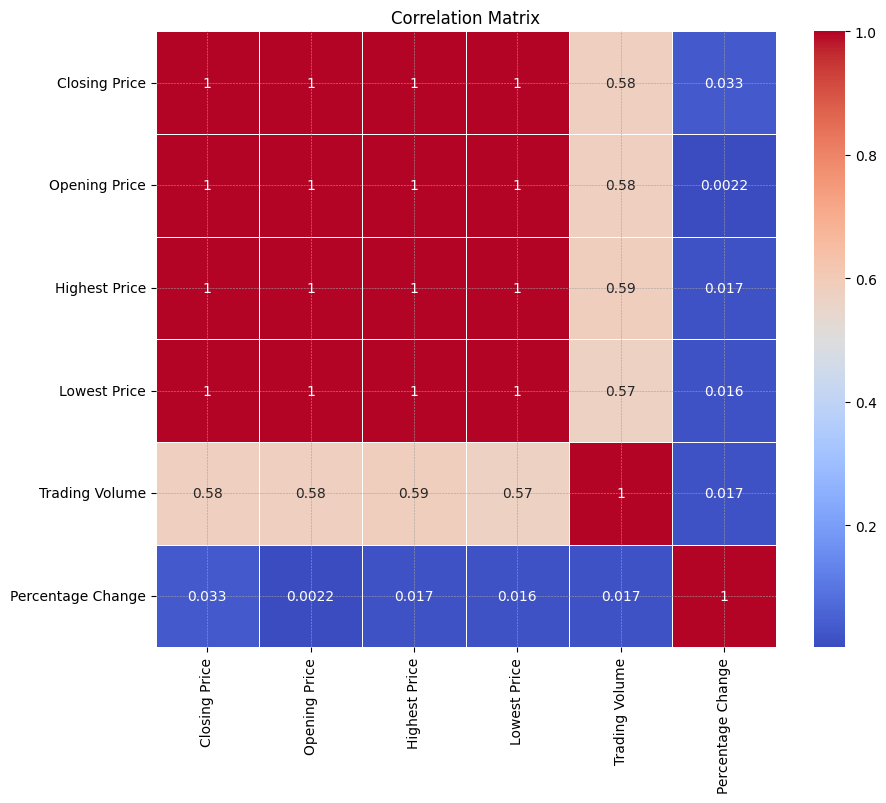

,Closing Price,Opening Price,Highest Price,Lowest Price,Trading Volume,Percentage Change
Closing Price,1.000000,0.999231,0.999708,0.999633,0.581180,0.033365
Opening Price,0.999231,1.000000,0.999650,0.999691,0.579514,0.002159
Highest Price,0.999708,0.999650,1.000000,0.999598,0.586110,0.017443
Lowest Price,0.999633,0.999691,0.999598,1.000000,0.573409,0.016117
Trading Volume,0.581180,0.579514,0.586110,0.573409,1.000000,0.016780
Percentage Change,0.033365,0.002159,0.017443,0.016117,0.016780,1.000000


In [ ]:
# Correlation matrix
correlation_matrix = train.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

correlation_matrix


**Trend analysis**

In [ ]:
def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

def get_season(s, yearly_periods=4, degree=3):
    X = [i%(365/4)for i in range(0,len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

def get_trend(s, degree=3):
    X =list(range(len(s)))
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)

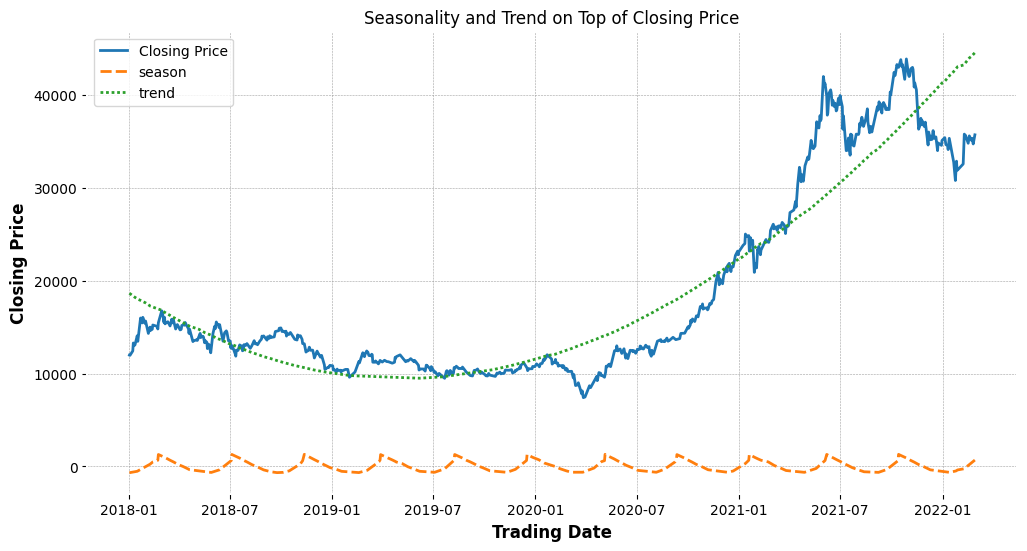

In [ ]:
# Seasonality and trend on top of Close Price
plt.figure(figsize=(12,6))

train['trend'] = get_trend(train['Closing Price'])
train['season'] = get_season(train['Closing Price'] - train['trend'])

sns.lineplot(data=train[['Closing Price','season','trend']])
plt.ylabel('Closing Price')
plt.title('Seasonality and Trend on Top of Closing Price')
plt.show()

Trend Analysis with Moving Averages

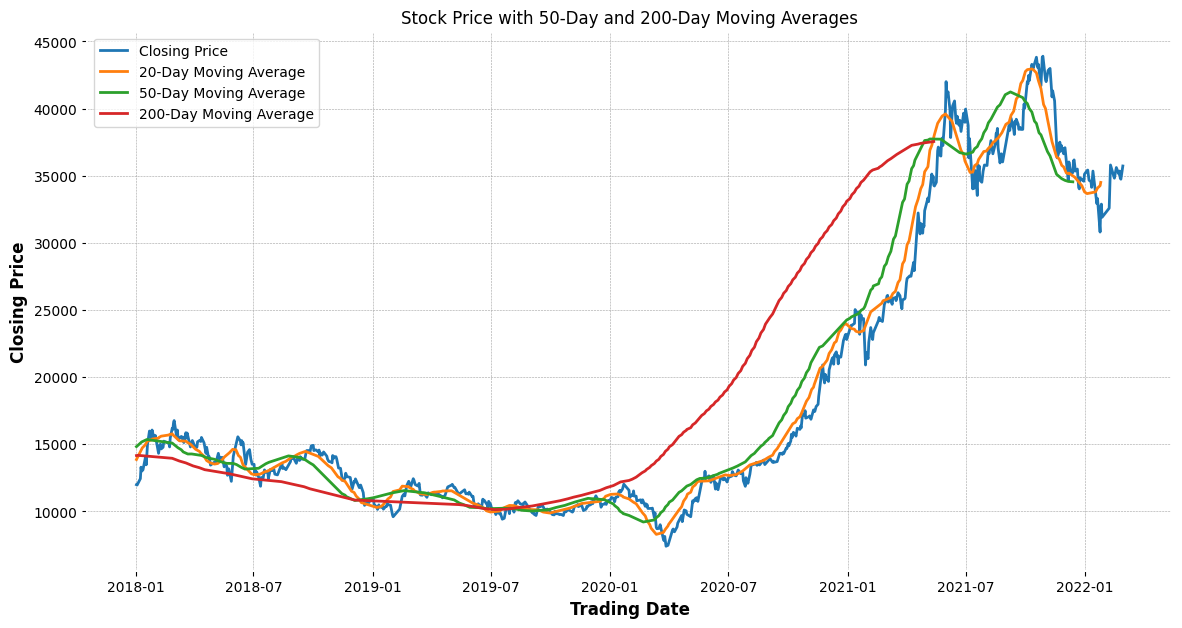

In [ ]:
# Calculate moving averages
train['MA50'] = train['Closing Price'].rolling(window=50).mean()
train['MA200'] = train['Closing Price'].rolling(window=200).mean()
train['MA20'] = train['Closing Price'].rolling(window=20).mean()

# Plot the stock price along with moving averages
plt.figure(figsize=(14, 7))
plt.plot(train['Closing Price'], label='Closing Price')
plt.plot(train['MA20'], label='20-Day Moving Average')
plt.plot(train['MA50'], label='50-Day Moving Average')
plt.plot(train['MA200'], label='200-Day Moving Average')
plt.xlabel('Trading Date')
plt.ylabel('Closing Price')
plt.title('Stock Price with 50-Day and 200-Day Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


Volatility Analysis

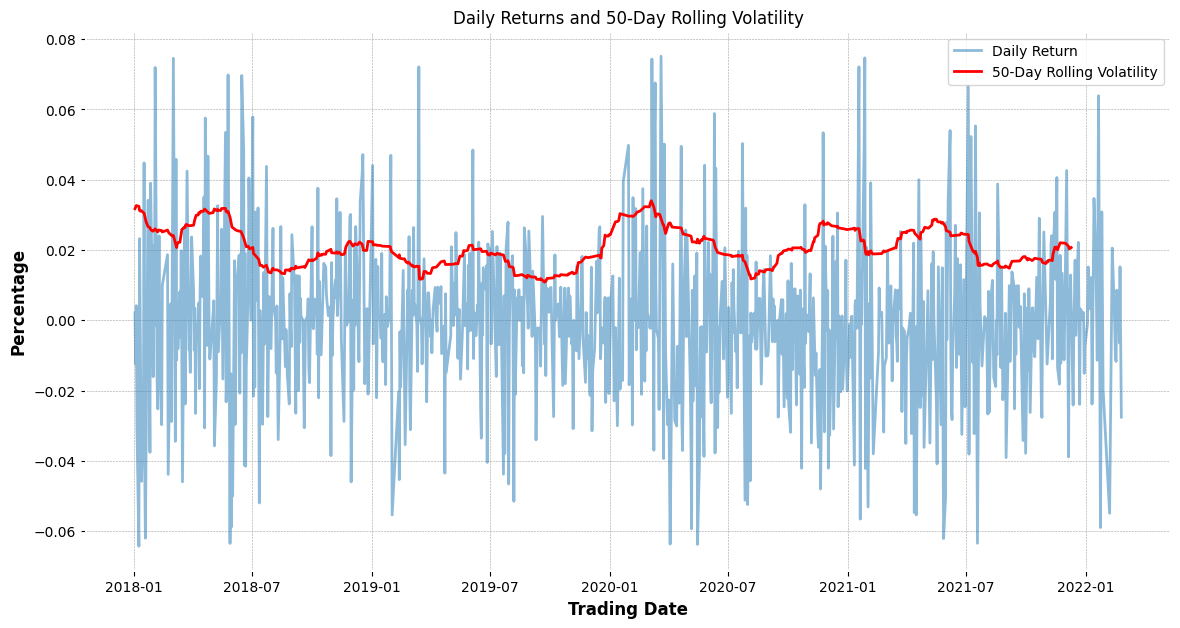

In [ ]:
# Calculate daily returns
train['Daily Return'] = train['Closing Price'].pct_change()

# Calculate rolling volatility (standard deviation of returns)
train['Volatility'] = train['Daily Return'].rolling(window=50).std()

# Plot the daily returns and rolling volatility
plt.figure(figsize=(14, 7))
plt.plot(train['Daily Return'], label='Daily Return', alpha=0.5)
plt.plot(train['Volatility'], label='50-Day Rolling Volatility', color='red')
plt.xlabel('Trading Date')
plt.ylabel('Percentage')
plt.title('Daily Returns and 50-Day Rolling Volatility')
plt.legend()
plt.grid(True)
plt.show()


Volume Analysis

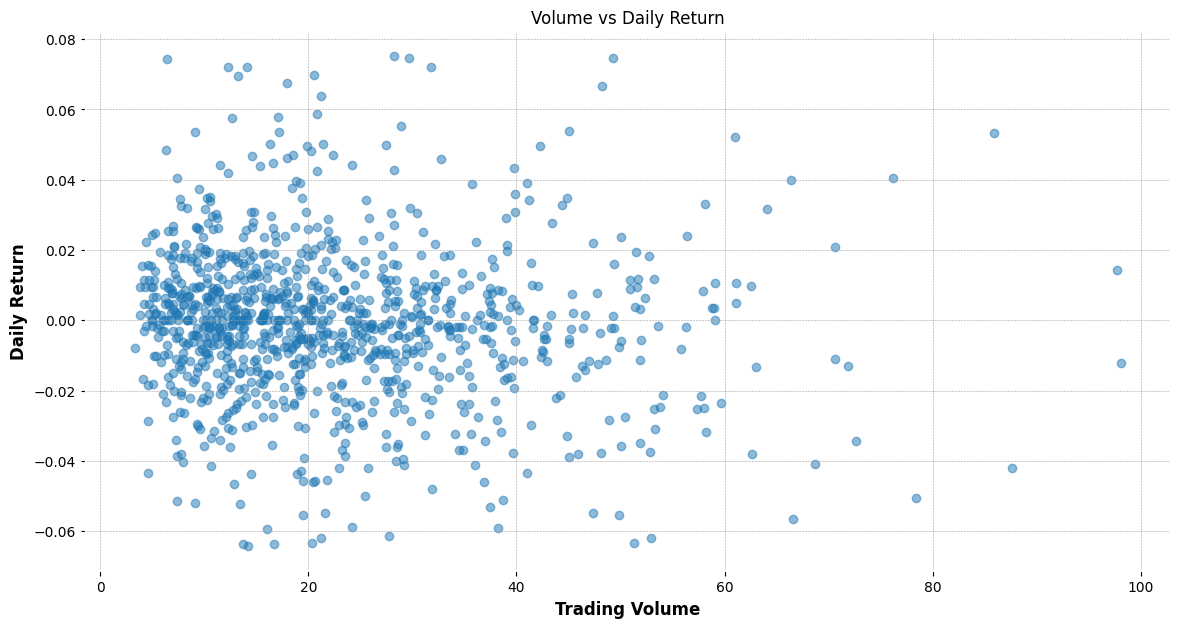

,Trading Volume,Daily Return
Trading Volume,1.000000,-0.086209
Daily Return,-0.086209,1.000000


In [ ]:
# Scatter plot of volume vs daily returns
plt.figure(figsize=(14, 7))
plt.scatter(train['Trading Volume'], train['Daily Return'], alpha=0.5)
plt.xlabel('Trading Volume')
plt.ylabel('Daily Return')
plt.title('Volume vs Daily Return')
plt.grid(True)
plt.show()

# Correlation between volume and daily returns
volume_return_correlation = train[['Trading Volume', 'Daily Return']].corr()

volume_return_correlation

The relationship between volume and price

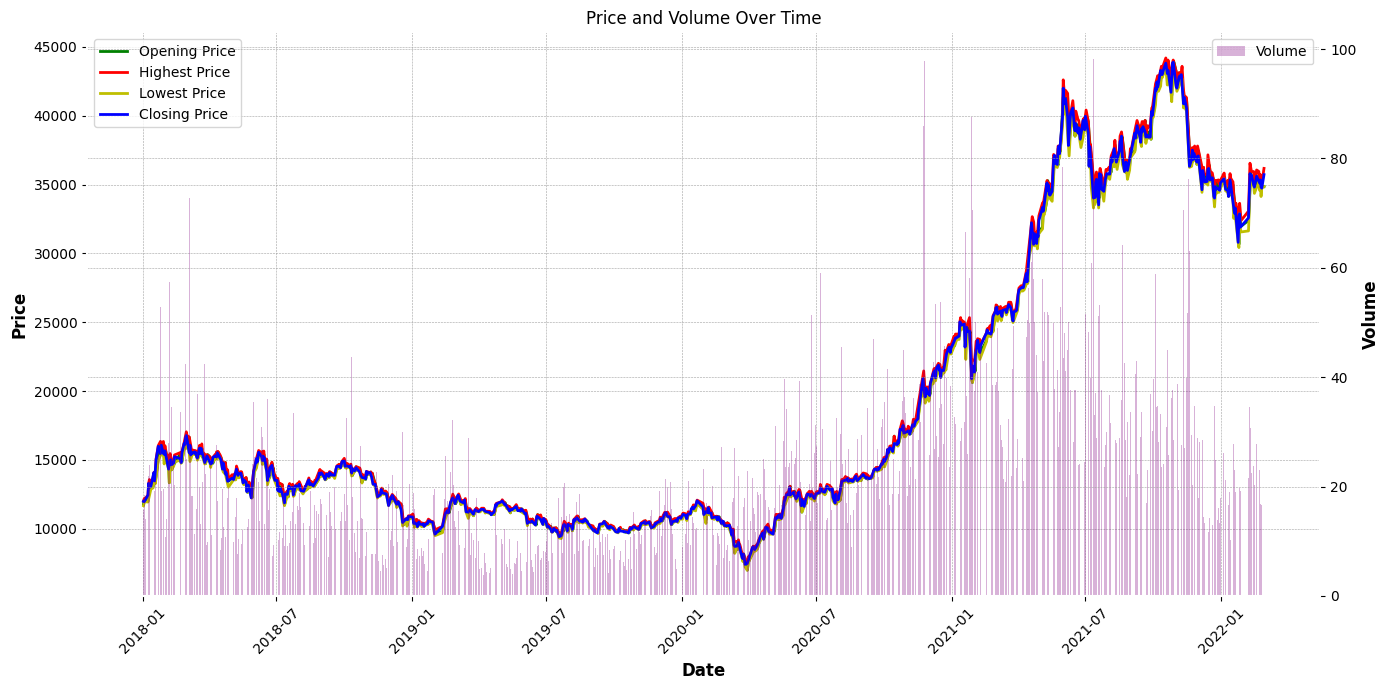

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(train.index, train['Opening Price'], linestyle='-', color='g', label='Opening Price')
ax1.plot(train.index, train['Highest Price'], linestyle='-', color='r', label='Highest Price')
ax1.plot(train.index, train['Lowest Price'], linestyle='-', color='y', label='Lowest Price')
ax1.plot(train.index, train['Closing Price'], linestyle='-', color='b', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(train.index, train['Trading Volume'], color='purple', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

plt.title('Price and Volume Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()